<img width=150 src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/NumPy_logo.svg/200px-NumPy_logo.svg.png"></img>

* 重點
  * 如何模擬這些分配的樣本點
  * 進行一些機率的運算，包含以下連續型分配        
    1. 均勻分配( Uniform Distribution )     
    2. 常態分配( Normal Distribution )   
  * 透過模擬來學習中央極限定理，由實際觀察，看其他分配怎麼變成常態分配的過程

In [1]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns

# 連續均勻分配 

* [scipy.stats教學](https://www.yiibai.com/scipy/scipy_stats.html)
* [stats.uniform 相關用法](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)    
  * stats.uniform 中的  loc 和 scale，組成 uniform 分配的上下界    
    * low=loc   
    * high=loc+scale  

* f(x) 為 X 的機率分配函數（機率密度函數），則 f(x) 符合以下條件：
  1. $ f(x) \geqslant 0 $
  2. $ f(x) $ 圖形下總面積為 1，即 $ \int_{-\infty}^{\infty} f(x) dx = 1 $
* f(x) 並非機率，即 $ f(a) \neq P(X=a)$，a 為任意數
* f(x) 圖形下面積才為機率
* $ P(-2 \leq X \leq 2) =  \int_{-2}^{2} f(x) dx$
* 期望值
  * $ E(X) =  \int_{-\infty}^{\infty} x*f(x) dx $
* 變異數
  * $ Var(X) = E(X^2)-E(X)^2 =  \int_{-\infty}^{\infty} x^2*f(x) dx-E(X)^2 $
* 累積分布函數(cdf)
  * 又叫分佈函數，是機率密度函數的積分，能完整描述一個實隨機變數 X 的機率分佈
  * $ F(X) = P(X \leq x)$

## 均勻分配

* 一個均勻分佈在區間 [a,b] 上的連續型隨機變量 X，記做 X ~ U(a, b)
* 機率密度函數(pdf)
  \begin{align*}
  f(x)=\left\{\begin{array}{lll}
                \frac{1}{b-a} &, for  a \leq x \leq b \\
                0 & , otherwise
              \end{array}\right.
  \end{align*}
* 累積分布函數(cdf)
  \begin{align*}
  F(x)=\left\{\begin{array}{lll}
                0 &, for  x < a \\
                \frac{x-a}{b-a} &, for a \leq x < b \\
                1 &, for x \geq b
              \end{array}\right.
  \end{align*}
* 期望值
  * $ E(X) = \frac{a+b}{2} $
* 變異數
  * $ Var(X) = \frac{(b-a)^2}{12} $
* 語法

| 連續型均勻分配 | 語法 |
|---------------|:----------:|
| 機率質量函數 | uniform.pdf |
| 累積機率函數 | uniform.cdf |
| 樣本點 | uniform.rvs |
| 統計量計算 | uniform.stats |


1. 設定使用參數

In [2]:
low=1
high=5
x=np.linspace(0, 10, 50)

2. 產生 pdf

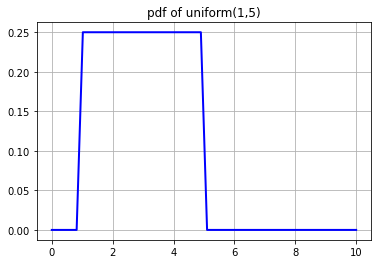

In [3]:
y = stats.uniform.pdf(x,low, high-low)
plt.plot(x, y, "b-", linewidth=2)
plt.grid(True)
plt.title('pdf of uniform(1,5)')
plt.show()

3. 計算離散均勻分配的累積機率 (cumulative density function)，pdf 的積分

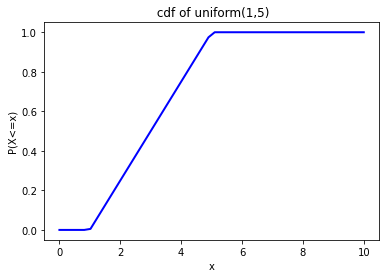

[0.         0.         0.         0.         0.         0.00510204
 0.05612245 0.10714286 0.15816327 0.20918367 0.26020408 0.31122449
 0.3622449  0.41326531 0.46428571 0.51530612 0.56632653 0.61734694
 0.66836735 0.71938776 0.77040816 0.82142857 0.87244898 0.92346939
 0.9744898  1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


In [4]:
cumsum_probs =  stats.uniform.cdf(x,low, high-low)
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title(' cdf of uniform(1,5)')
plt.plot(x, cumsum_probs,"b-", linewidth=2)
plt.show()
print(cumsum_probs)

4. 透過 cdf ，給定一個 機率值，反推出對應到的 x

In [5]:
k = stats.uniform.ppf(cumsum_probs , low, high)
print(k)
#看上圖看結果

[1.         1.         1.         1.         1.         1.0255102
 1.28061224 1.53571429 1.79081633 2.04591837 2.30102041 2.55612245
 2.81122449 3.06632653 3.32142857 3.57653061 3.83163265 4.08673469
 4.34183673 4.59693878 4.85204082 5.10714286 5.3622449  5.61734694
 5.87244898 6.         6.         6.         6.         6.
 6.         6.         6.         6.         6.         6.
 6.         6.         6.         6.         6.         6.
 6.         6.         6.         6.         6.         6.
 6.         6.        ]


5. 產生符合隨機樣本點 (random sample)

[2.52008532 1.48995293 1.70103366 2.67997527 2.90643553 2.64177347
 2.99052271 1.56340437 3.41865015 4.58149591 4.51617172 1.34660796
 2.80137057 2.90055769 4.64765698 1.58985802 4.81039896 1.8021739
 4.84151427 3.89464372]


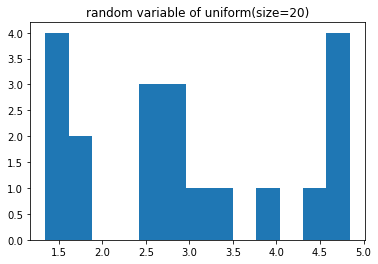

In [6]:
X = stats.uniform.rvs(low, high-low,size=20)
print(X)
plt.hist(X,bins=13)
plt.title('random variable of uniform(size=20)')
plt.show()
#試試看，，每一次的結果一樣嗎?

6. 計算固定參數下，隨機變數的平均數、變異數、偏度和峰度

In [7]:
stat_uniform=stats.uniform.stats(low, high-low,moments='mvks')
print(stat_uniform)
print(type(stat_uniform))
print("randint mean=",float(stat_uniform[0]))
print("randint variance=",float(stat_uniform[1]))
print("randint kurtosis=",float(stat_uniform[2]))
print("randint skew=",float(stat_uniform[3]))

(array(3.), array(1.33333333), array(0.), array(-1.2))
<class 'tuple'>
randint mean= 3.0
randint variance= 1.3333333333333333
randint kurtosis= 0.0
randint skew= -1.2


## 常態分配
* [stats.norm 相關用法](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)    
stats.norm 中的  loc,scale 分別代表   
loc=mu      
scale=sigma     

* 常態分佈(normal distribution)，又稱高斯分佈(Gaussian distribution)
* 若隨機變數 X 服從一個平均數為 μ 和 標準差為 σ 的常態分配，其記為 X ~ N (μ, σ2)
* 機率密度函數(pdf)
  * $ f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}}$
* 期望值 $\mu$ 決定 pdf 位置
  * $ E(X) = \mu $
* 變異數 $\sigma$ 決定 pdf 寬度
  * $ Var(X) = \sigma^2 $
* 特性
  * 以平均數為中線，構成左右對稱之單峰、鐘型曲線分佈
  * 觀察值之範圍為負無限大至正無限大之間
  * 變項之平均數、中位數和眾數為同一數值
  * $\mu$＝0，$\sigma^2$＝1，稱為標準常態分配

* 語法

| 連續型均勻分配 | 語法 |
|---------------|:----------:|
| 機率質量函數 | norm.pdf |
| 累積機率函數 | norm.cdf |
| 樣本點 | norm.rvs |
| 統計量計算 | norm.stats |


* 標準常態分配
  * 標準化
    $ Z = \frac{X-\mu}{\sigma} $
  * 特性
    * 落在 $ \mu \pm 1個 \sigma：68.3 \% $
    * 落在 $ \mu \pm 2個 \sigma：95.4 \% $
    * 落在 $ \mu \pm 3個 \sigma：99.7 \% $

1. 設定使用參數

In [8]:
mu=0
sigma=1
x=np.linspace(-4, 4, 500)

2. 產生 pdf圖

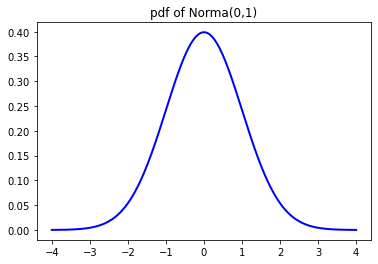

In [9]:
y = stats.norm.pdf(x,mu, sigma)
plt.plot(x, y, "b-", linewidth=2)
#plt.grid(True)
plt.title('pdf of Norma(0,1)')
plt.show()

3. 計算常態分配的累積機率 (cumulative density function)，pdf 的積分

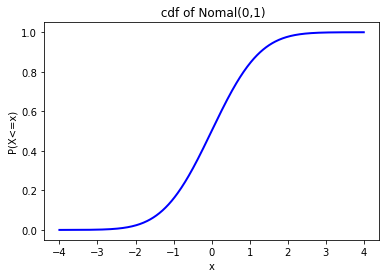

6.159755045951987e-05


In [10]:
cumsum_probs =  stats.norm.cdf(x,mu, sigma)
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title(' cdf of Nomal(0,1)')
plt.plot(x, cumsum_probs,"b-", linewidth=2)
plt.show()
print(cumsum_probs[10])

4. 透過 cdf ，給定一個 機率值，反推出對應到的 x

In [11]:
k = stats.norm.ppf(cumsum_probs ,mu, sigma)
print(k[1:10])
#看上圖比對結果

[-3.98396794 -3.96793587 -3.95190381 -3.93587174 -3.91983968 -3.90380762
 -3.88777555 -3.87174349 -3.85571142]


5. 產生符合隨機樣本點 (random sample)

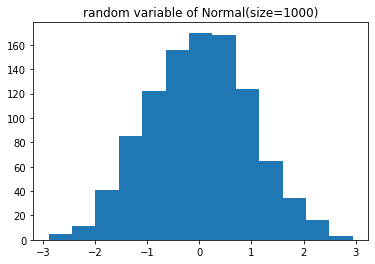

In [12]:
X = stats.norm.rvs(mu, sigma,size=1000)
plt.hist(X,bins=13)
plt.title('random variable of Normal(size=1000)')
plt.show()
#試試看，，每一次的結果一樣嗎?

6. 計算固定參數下，隨機變數的平均數、變異數、偏度和峰度

In [13]:
stat_norm=stats.norm.stats(mu, sigma,moments='mvks')
print(stat_norm)
print(type(stat_norm))
print("normal mean=",float(stat_norm[0]))
print("normal variance=",float(stat_norm[1]))
print("normal kurtosis=",float(stat_norm[2]))
print("normal skew=",float(stat_norm[3]))
#所以可以看到標準常態分配的峰度和偏度為0

(array(0.), array(1.), array(0.), array(0.))
<class 'tuple'>
normal mean= 0.0
normal variance= 1.0
normal kurtosis= 0.0
normal skew= 0.0


## 中央極限定理

* 從平均數 $\mu$﹐標準差 $\sigma$ 的母體中抽樣大小為 n 的簡單隨機樣本，當樣本數 n 夠大時，樣本平均數($ \bar{X}_n $) 的抽樣分配會近似於常態分配
  * 一般統計實務，大部分的應用假設 n 大於 30 時，樣本平均數($ \bar{X}_n $) 的抽樣分配接近常態分配
  * 當母體為常態分配，不管 n，樣本平均數($ \bar{X}_n $) 的抽樣分配皆為常態分配
* $ X \sim 任一分配 $，符合
  * $ E(X) $ 存在
  * $ 0 \leq Var(X) \leq \infty $ 存在 
  
 $ \Rightarrow \bar{X}_n \to 常態分配$

### 用模擬驗證中央極限定理
* X~bernoulli(p)
  從伯努利分配中，抽取 n 個樣本，$X_1,..., X_n$，重複抽了 500 次，每一次都計算 $ \bar{X}_n $，長條圖呈現 500 次 $ \bar{X}_n $ 結果

In [14]:
# 計算樣本平均數
def cal_mean(x):
    return(sum(x)/len(x))

* 模擬重複抽樣 500次，看樣本平均(n=100)的分布情形

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


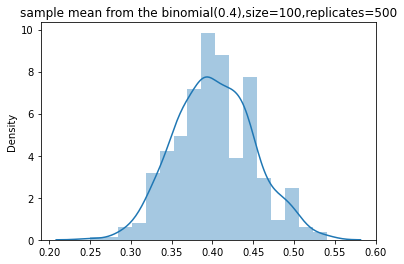

In [15]:
p=0.4
mean_rv=[]
for i in range(500):
    X = stats.bernoulli.rvs(p,size=100)
    mean_rv.append(cal_mean(X))
sns.distplot(mean_rv)
plt.title('sample mean from the binomial(0.4),size=100,replicates=500')
plt.show()

* 模擬重複抽樣 500次，看樣本平均(n=1000)的分布情形

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


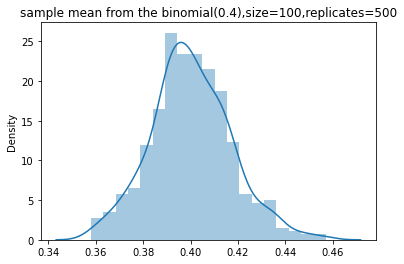

In [16]:
p=0.4
mean_rv=[]
for i in range(500):
    X = stats.bernoulli.rvs(p,size=1000)
    mean_rv.append(cal_mean(X))
sns.distplot(mean_rv)
plt.title('sample mean from the binomial(0.4),size=100,replicates=500')
plt.show()

* 模擬重複抽樣 500次，看樣本平均(n=10000)的分布情形

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


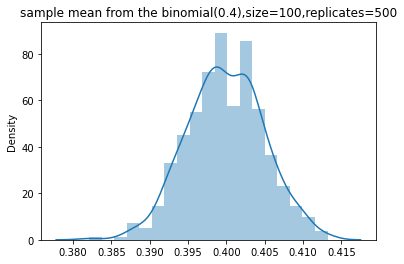

In [17]:
p=0.4
mean_rv=[]
for i in range(500):
    X = stats.bernoulli.rvs(p,size=10000)
    mean_rv.append(cal_mean(X))
sns.distplot(mean_rv)
plt.title('sample mean from the binomial(0.4),size=100,replicates=500')
plt.show()

* 模擬重複抽樣 500次，看樣本平均(n=100000)的分布情形

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


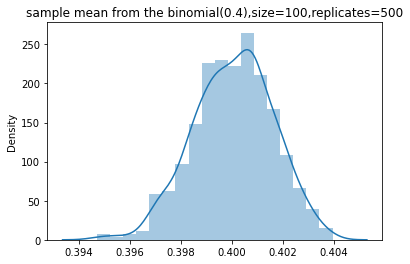

In [18]:
p=0.4
mean_rv=[]
for i in range(500):
    X = stats.bernoulli.rvs(p,size=100000)
    mean_rv.append(cal_mean(X))
sns.distplot(mean_rv)
plt.title('sample mean from the binomial(0.4),size=100,replicates=500')
plt.show()